✅ Class distribution after SMOTE:
health_condition
healthy         1711
Hypertension    1711
Diabetes        1711
Asthma          1711
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Train Accuracy: 0.9330800701344243
✅ Test Accuracy : 0.51

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.11      0.16      0.13        57
Hypertension       0.19      0.20      0.19        87
     healthy       0.71      0.66      0.68       427

    accuracy                           0.51       600
   macro avg       0.25      0.25      0.25       600
weighted avg       0.54      0.51      0.52       600



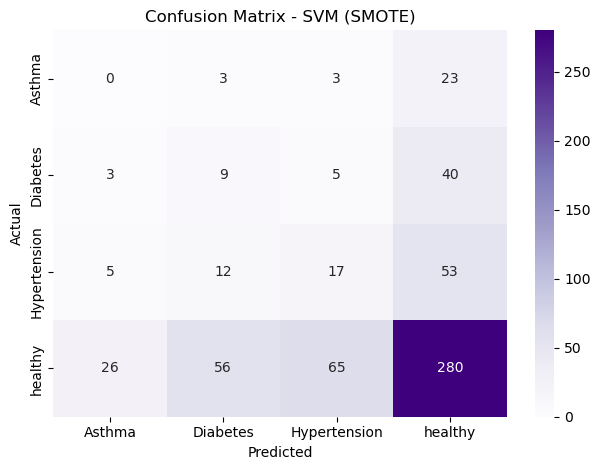

In [3]:

#  1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 2. Load Datasets

Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')


#  3. Split Features and Target

X = Dataset_Train.drop(columns=['health_condition'])
y = Dataset_Train['health_condition']

# 🔹 4. Identify Column Types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()


# 5. Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Fit-transform training data
X_processed = preprocessor.fit_transform(X)

# 🔹 6. Apply SMOTE for Class Balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("✅ Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


# 🔹 7. Label Encode Target
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Prepare test data
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']
X_test_processed = preprocessor.transform(X_test)
y_test_encoded = le.transform(y_test)


# 🔹 8. Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_resampled, y_resampled_encoded)

# 🔹 9. Predict and Evaluate

y_train_pred_encoded = svm_model.predict(X_resampled)
y_test_pred_encoded = svm_model.predict(X_test_processed)

# Decode predictions
y_train_pred = le.inverse_transform(y_train_pred_encoded)
y_test_pred = le.inverse_transform(y_test_pred_encoded)

print("✅ Train Accuracy:", accuracy_score(y_resampled, y_train_pred))
print("✅ Test Accuracy :", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# 🔹 10. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - SVM (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.metrics import recall_score, f1_score

# Train Sensitivity (Recall)
train_sensitivity = recall_score(y_resampled, y_train_pred, average='macro')

# Test Sensitivity (Recall)
test_sensitivity = recall_score(y_test, y_test_pred, average='macro')

# Train F1 Score
train_f1 = f1_score(y_resampled, y_train_pred, average='macro')

# Test F1 Score
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("\n🔹 Additional Performance Metrics")
print(f"✅ Train Sensitivity (Recall): {train_sensitivity:.4f}")
print(f"✅ Test Sensitivity (Recall) : {test_sensitivity:.4f}")
print(f"✅ Train F1 Score           : {train_f1:.4f}")
print(f"✅ Test F1 Score            : {test_f1:.4f}")



🔹 Additional Performance Metrics
✅ Train Sensitivity (Recall): 0.9331
✅ Test Sensitivity (Recall) : 0.2523
✅ Train F1 Score           : 0.9318
✅ Test F1 Score            : 0.2510
